# Eyetracking analysis

from https://github.com/Gilles86/riskeye/blob/main/riskeye/eyetracking/saccades_and_raw_behavior.ipynb


In [2]:
#from riskeye.utils.data import get_all_behavior, get_all_eyepos_info, get_all_subjects, Subject
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plot_folder = op.join(bids_folder, 'plots_and_ims', 'eyetracking')


In [9]:
# create summarized fixations
# n_saccades, first_saccade, last_saccade, n_left, n_right, p_left, p_right

from numrisk.behavior_risk.utils_eyetrack import Subject
subject_id = 6
sub = Subject(subject_id=subject_id, bids_folder= bids_folder)

tmp = sub.get_trialwise_saccade_info()
tmp

n_saccades first_saccade  last_saccade  left_duration  \
subject trial                                                          
06      0              35   left_option  right_option         7002.0   
        1             579   left_option   left_option       293890.0   
        2               5   left_option   left_option         1112.0   
        3               4   left_option  right_option         1068.0   
        4             562   left_option   left_option       289440.0   
...                   ...           ...           ...            ...   
        189             3   left_option   left_option         1598.0   
        190             0           NaN           NaN            NaN   
        191             0           NaN           NaN            NaN   
        192             0           NaN           NaN            NaN   
        999             2  right_option   left_option          272.0   

               right_duration  
subject trial                  
06      0              7202.0  
        1            161112.0  
        2               906.0  
        3               913.0  
        4            157524.0  
...                       ...  
        189             756.0  
        190               NaN  
        191               NaN  
        192               NaN  
        999             398.0  

[165 rows x 5 columns]

In [10]:
#def get_saccades(self, merge_saccades=True):
saccades = sub.get_saccades_raw()
messages = sub.get_eyetracker_timings().unstack('type')

saccades_per_block = []

for ix, row in messages.iterrows():
    s = saccades.loc[(ix[0], slice(row.stim, row.response)), :] #  Selects saccades for the current trial, between the times stimulus onset and response.
    saccades_per_block.append(s.droplevel([0]))

saccades_per_block = pd.concat(saccades_per_block, keys=messages.index)


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(


Text(0.5, 1.02, 'Subject 6')

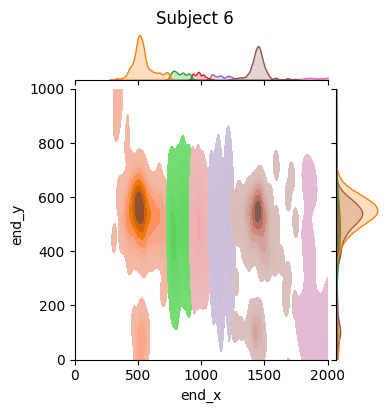

In [12]:
def get_fixation_targets(df):

    median = 1000 # df['end_x'].median()
    dist_to_median_out= 750
    dist_to_median = 250
    #bins = [-np.inf, median-350, median-100, median-75, median+75, median+100, median+350, np.inf]
    bins = [-np.inf, median-dist_to_median_out, median-dist_to_median, median-75, median+75, median+dist_to_median, median+dist_to_median_out, np.inf]

    return pd.cut(df['end_x'], bins=bins, labels=['outside_left', 'left_option', 'center_left', 'fixation', 'center_right', 'right_option', 'outside_right'])

saccades_per_block['fixation_target'] = get_fixation_targets(saccades_per_block)
saccades_per_block['end_x'].median()

fig = sns.jointplot(data=saccades_per_block, x='end_x', y='end_y', hue='fixation_target', kind='kde', fill=True,
              height=4, aspect=1.5,
              xlim=(0, 2000),ylim=(0,1000), legend=False,)
fig.fig.suptitle(f'Subject {subject_id}' , y=1.02)

## Plot a couple of subs
all saccades OR only saccades within trial 

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/pyth

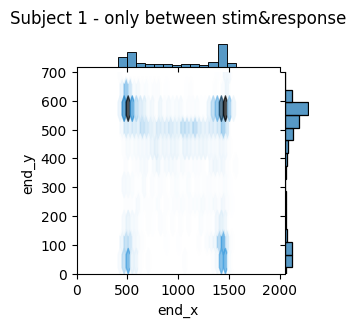

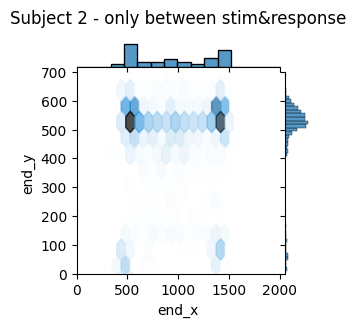

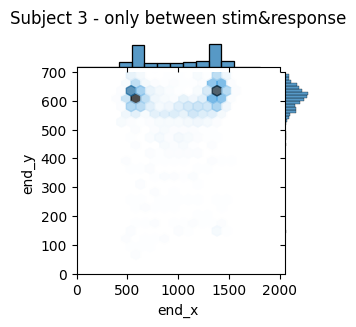

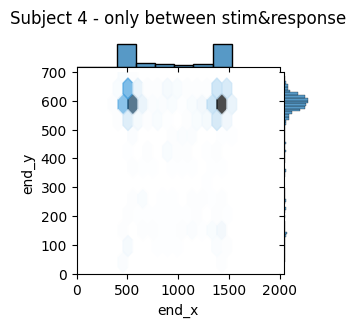

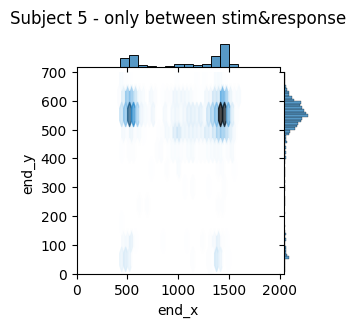

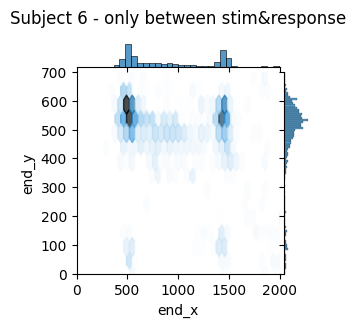

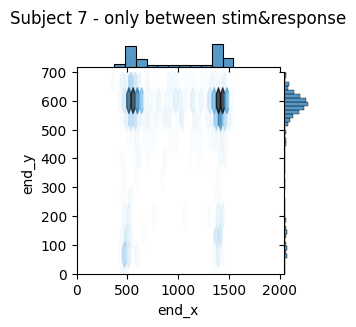

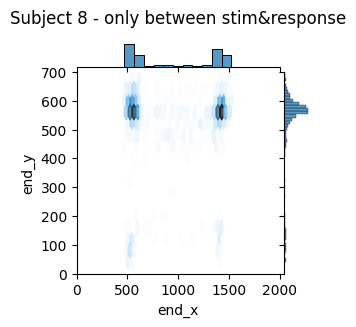

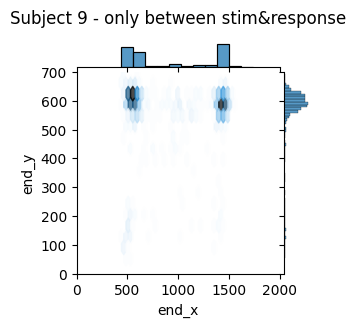

In [ ]:
for subject_id in range(1,10):
    sub = Subject(subject_id=subject_id, bids_folder= bids_folder)
    saccades = sub.get_saccades_raw()
    messages = sub.get_eyetracker_timings().unstack('type')

    saccades_per_block = []
    for ix, row in messages.iterrows():
        s = saccades.loc[(ix[0], slice(row.stim, row.response)), :] #  Selects saccades for the current trial, between the times stimulus onset and response.
        saccades_per_block.append(s.droplevel([0]))

    saccades_per_block = pd.concat(saccades_per_block, keys=messages.index)
    fig = sns.jointplot(saccades_per_block,x='end_x', y='end_y',kind='hex', #hue='fixation_target',
                        alpha=0.7, height=3, ratio=7,
                        xlim=(0, 2000),ylim=(0,700))
    fig.ax_joint.set_title(f'Subject {subject_id} - only between stim&response',y=1.2)


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/Users/mrenke/mambaforge/envs/behav_fit/lib/pyth

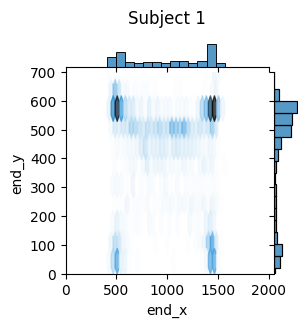

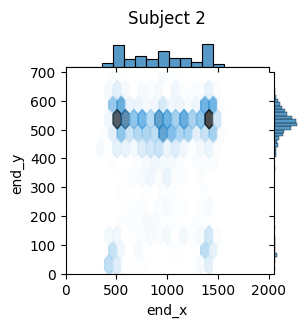

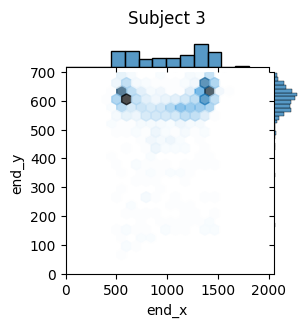

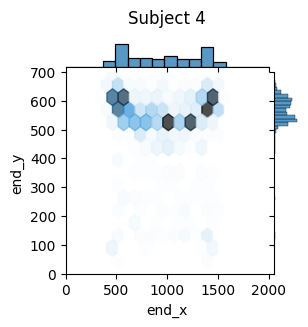

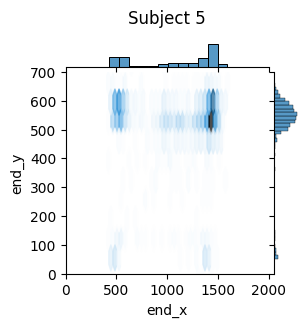

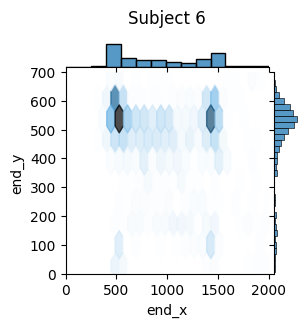

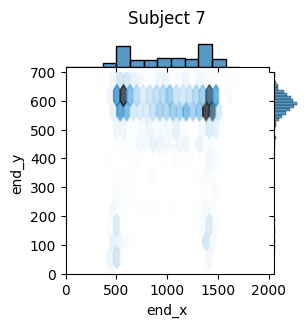

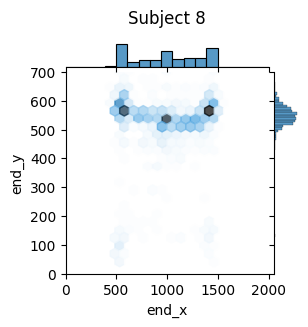

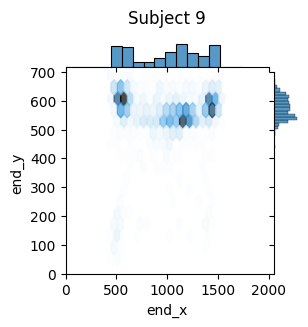

In [ ]:
for subject_id in range(1,10):
    sub = Subject(subject_id=subject_id, bids_folder= bids_folder)
    saccades = sub.get_saccades_raw()
    fig = sns.jointplot(saccades,x='end_x', y='end_y',kind='hex', #hue='fixation_target',
                        alpha=0.7, height=3, ratio=7,
                        xlim=(0, 2000),ylim=(0,700))
    fig.ax_joint.set_title(f'Subject {subject_id}',y=1.2)


/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_94732/1400794270.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


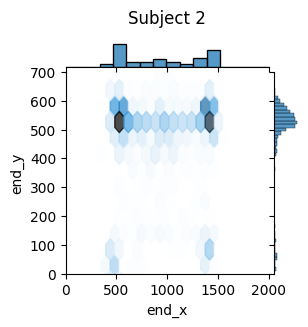

In [79]:
fig = sns.jointplot(saccades_per_block,x='end_x', y='end_y',kind='hex', #hue='fixation_target',
                        alpha=0.7, height=3, ratio=7,
                        xlim=(0, 2000),ylim=(0,700))
fig.ax_joint.set_title(f'Subject {subject_id}',y=1.2)
plt.tight_layout()

In [36]:
trial = '2'
saccades_per_block.xs(trial,0,'trial')

n eye  end_timestamp  duration  start_x  start_y  \
subject start_timestamp                                                       
01      8955350          150   R        8955390        42   1133.0    508.9   
        8955484          151   R        8955520        38    787.9    563.8   
        8955708          152   R        8955776        70    519.8    618.7   
        8955930          153   R        8955982        54   1468.1    590.3   
        8956140          154   R        8956158        20   1470.3    112.0   
        8956314          155   R        8956376        64   1460.7     83.8   
        8956498          156   R        8956574        78   1474.9    566.9   
        8956720          157   R        8956746        28    544.5    114.5   
        8956958          158   R        8957030        74    502.0     70.0   

                          end_x  end_y    amp  peak_velocity fixation_target  
subject start_timestamp                                                       
01      8955350           798.3  564.1   6.78            372     left_option  
        8955484           527.3  615.7   5.25            320    outside_left  
        8955708          1460.7  590.0  18.42            504   outside_right  
        8955930          1467.3  119.1   8.78            321   outside_right  
        8956140          1451.7   66.6   0.91             68   outside_right  
        8956314          1472.1  550.8   8.67            352   outside_right  
        8956498           549.9  124.0  19.79            538    outside_left  
        8956720           500.5   54.3   1.40            110    outside_left  
        8956958          1287.4  307.8  15.94            440    right_option

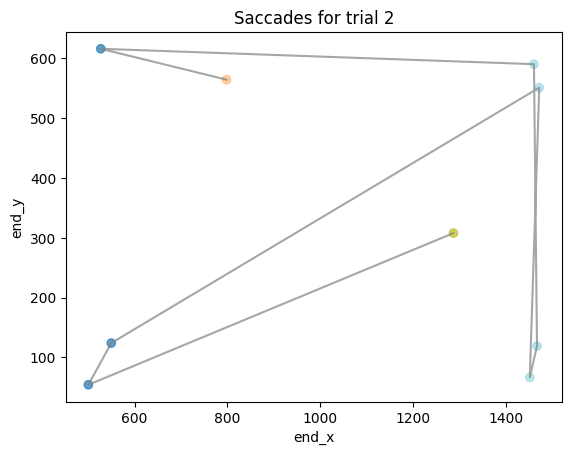

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

trial_data = saccades_per_block.xs(trial, 0, 'trial')

plt.scatter(trial_data.end_x, trial_data.end_y, c=trial_data.fixation_target.cat.codes, cmap='tab20', alpha=0.7)
plt.plot(trial_data.end_x, trial_data.end_y, color='gray', alpha=0.7)  # Connects the points with lines

plt.xlabel('end_x')
plt.ylabel('end_y')
plt.title(f'Saccades for trial {trial}')
plt.show()

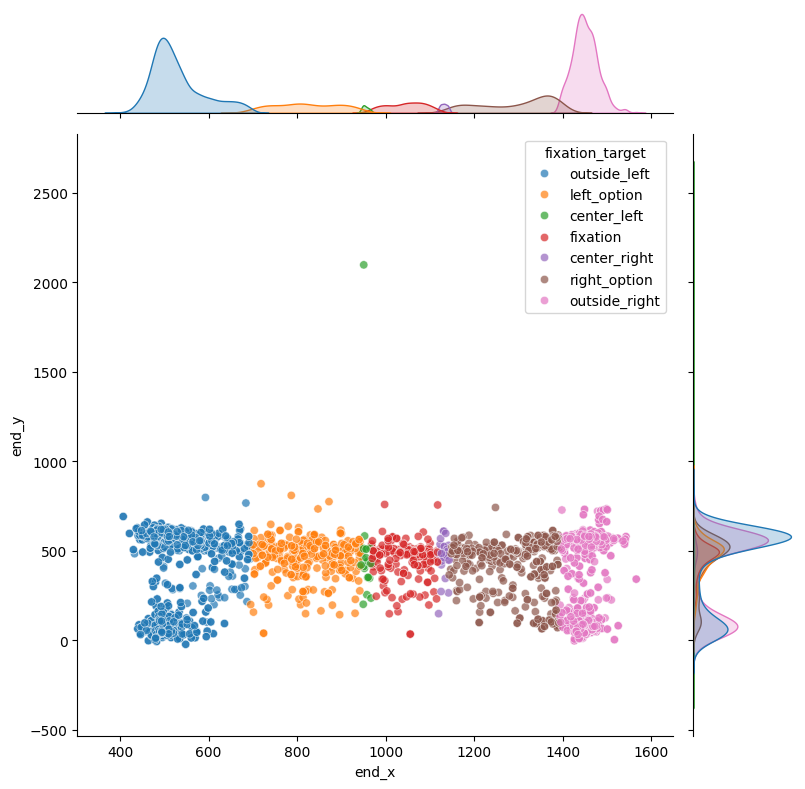